<a href="https://colab.research.google.com/github/mekaneeky/GoMyCode-Intro2AI-notebooks/blob/main/GMC_AI_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###
#
# Downloading Dataset CSV

!gdown --id 1YdbRKJZ0Kz742yDxIStLZIPIEUGlc1Cc


Downloading...
From: https://drive.google.com/uc?id=1YdbRKJZ0Kz742yDxIStLZIPIEUGlc1Cc
To: /content/titanic-passengers.csv
100% 62.6k/62.6k [00:00<00:00, 22.7MB/s]


In [2]:
import pandas as pd

titanic_df = pd.read_csv('/content/titanic-passengers.csv', delimiter=";")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
print("Mean age of titanic passenger: " + str(titanic_df["Age"].mean()) )
print("Youngest titanic passenger: " + str(titanic_df["Age"].min()) )
print("Oldest titanic passenger: " + str(titanic_df["Age"].max()) )


count_of_males = titanic_df["Sex"].value_counts()["male"]
count_of_females = titanic_df["Sex"].value_counts()["female"]

print("Males aboard the titanic: " + str(count_of_males))
print("Females aboard the titanic: " + str(count_of_females))



Mean age of titanic passenger: 29.69911764705882
Youngest titanic passenger: 0.42
Oldest titanic passenger: 80.0
Males aboard the titanic: 577
Females aboard the titanic: 314


In [5]:
##
# Replacing missing data
#

print(titanic_df.isnull().sum())
print("##########################")
print(titanic_df["Cabin"].value_counts())
print("##########################")
print(titanic_df["Embarked"].value_counts())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
##########################
C23 C25 C27    4
G6             4
B96 B98        4
D              3
F33            3
              ..
D15            1
D49            1
C101           1
C49            1
C7             1
Name: Cabin, Length: 147, dtype: int64
##########################
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [6]:

titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace=True)

## Since we have 3 values at the same frequency for the most frequent in the cabin
# it is best to fill the 3 values equally. To affect the distribution less
most_frequent_cabin = ["G6", "C23 C25 C27", "B96 B98"]
third_of_passengers = len(titanic_df)//3

titanic_df["Cabin"][:third_of_passengers].fillna(most_frequent_cabin[0], inplace=True)
titanic_df["Cabin"][third_of_passengers:third_of_passengers*2].fillna(most_frequent_cabin[1], inplace=True)
titanic_df["Cabin"][third_of_passengers*2:].fillna(most_frequent_cabin[2], inplace=True)

titanic_df["Embarked"].fillna("S", inplace=True)

titanic_df["Pclass"] = pd.Categorical(titanic_df["Pclass"])


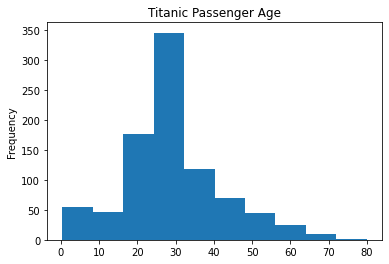

In [7]:
####
# Visualizing distribution of most important features
#
import matplotlib.pyplot as plt

plt.title("Titanic Passenger Age")
titanic_df["Age"].plot.hist()



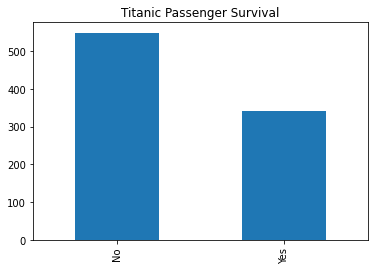

In [8]:
plt.title("Titanic Passenger Survival")
s_vc = titanic_df["Survived"].value_counts()
s_vc.plot.bar()

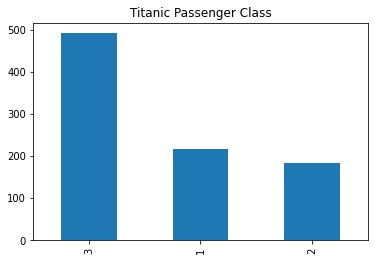

In [9]:
plt.title("Titanic Passenger Class")
s_vc = titanic_df["Pclass"].value_counts()
s_vc.plot.bar()

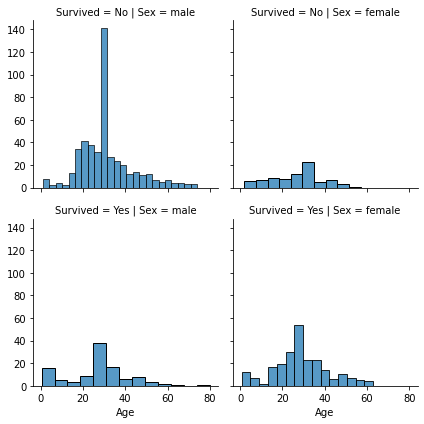

In [10]:
####
# 
# Correlation between Sex and Age in relation to Survival of passengers
#

import seaborn as sns


g = sns.FacetGrid(titanic_df, col="Sex", row="Survived")
g.map(sns.histplot, "Age")


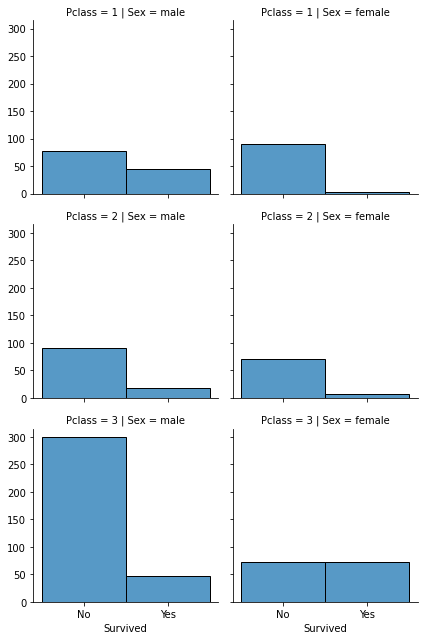

In [11]:
####
# 
# Correlation between Passenger class and Sex in relation to Survival of passengers
#

import seaborn as sns


g = sns.FacetGrid(titanic_df, col="Sex", row="Pclass")
g.map(sns.histplot, "Survived")


This provided function below plots a correlation matrix. Meaning that for each row i represents a feature/df_column and each column j represents another feature/df_column each entry i,j represents the correlation of column i to column j. if i == j it means that the columns are the same thus their correlation is 1

First the matrix is generated by 

```
corr = df.corr()
```

Then it is poltted as a heat map that maps the numbers from -1 to 1 as a gradient 


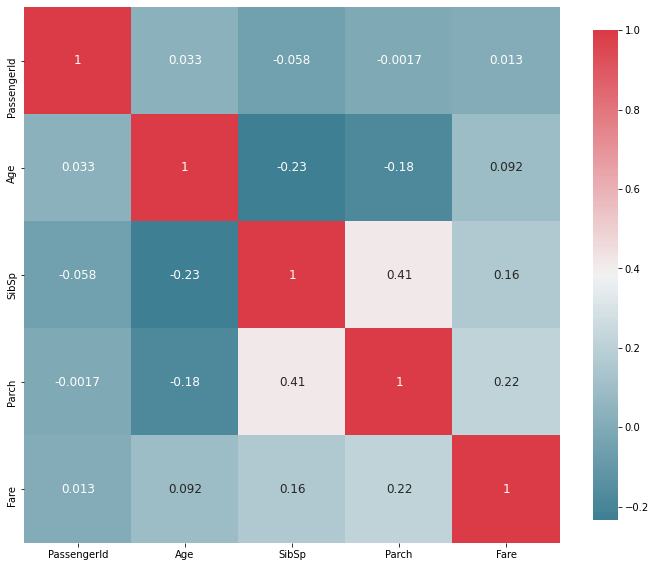

In [12]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

plot_correlation_map(titanic_df)

In [13]:
replacement_dict = {"Survived":{"Yes":1, "No":0}}
try:
    titanic_df.replace(replacement_dict,inplace=True)
except TypeError:
    pass
titanic_df[["Survived","Pclass"]].groupby(["Pclass"],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [14]:
titanic_df[["Survived","Sex","Pclass"]].groupby(["Sex","Pclass"],as_index=True).mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [15]:
####
#
# Dropping Name Column
#

nameless_titanic_df = titanic_df.drop(["Name"],"columns")
nameless_titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,male,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,male,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,female,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [16]:
import re
rgx = re.compile(".*")
rgx.findall("teez")

['teez', '']

In [17]:
try:
    titanic_df.drop("Title", "columns",inplace=True)
except:
    pass

import re

regex_to_match = re.compile("\w*\.")
def extract_titles(name):
    
    results = regex_to_match.findall(name)
    try:
        return results[0].replace(".","")
    except:
        print(name)

titanic_df["Title"] = titanic_df["Name"].map(extract_titles)
titanic_df["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Countess      1
Ms            1
Jonkheer      1
Capt          1
Sir           1
Mme           1
Lady          1
Name: Title, dtype: int64

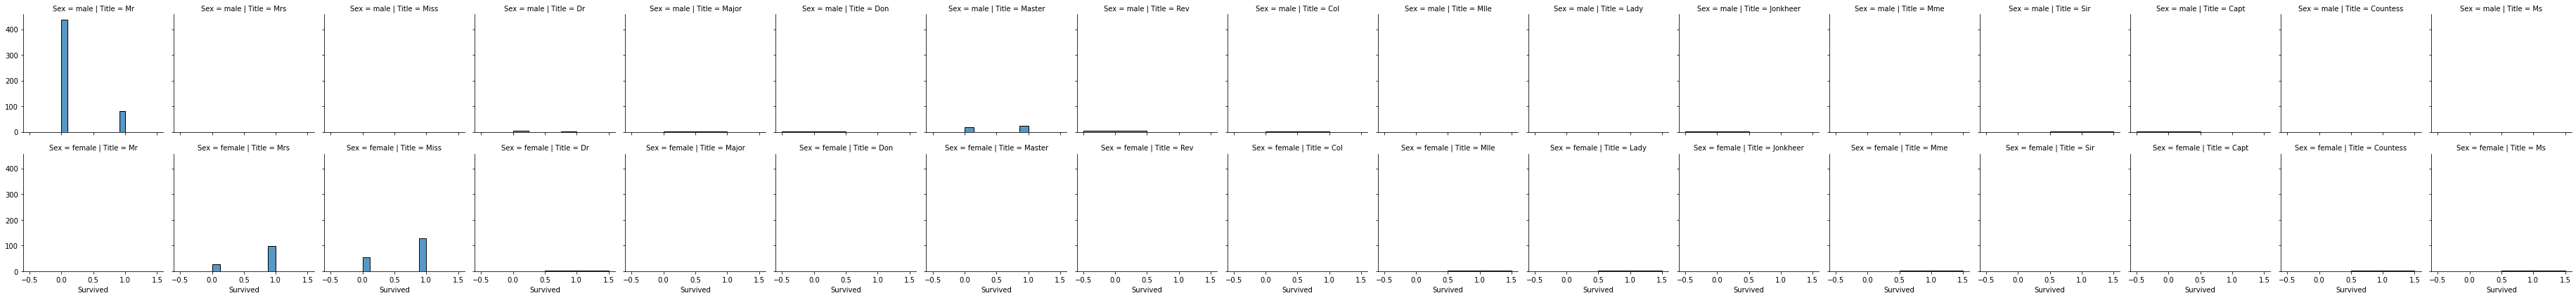

In [18]:
####
# 
# Correlation between Title and Sex in relation to Survival of passengers
#

import seaborn as sns


g = sns.FacetGrid(titanic_df, col="Title", row="Sex")
g.map(sns.histplot, "Survived")


In [19]:
Title_Dictionary = {
 "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"
                    }
title_replacement_dict = {"Title":Title_Dictionary}
titanic_df.replace(title_replacement_dict, inplace=True)
titanic_df["Title"].head()

0    Mrs
1    Mrs
2    Mrs
3    Mrs
4    Mrs
Name: Title, dtype: object

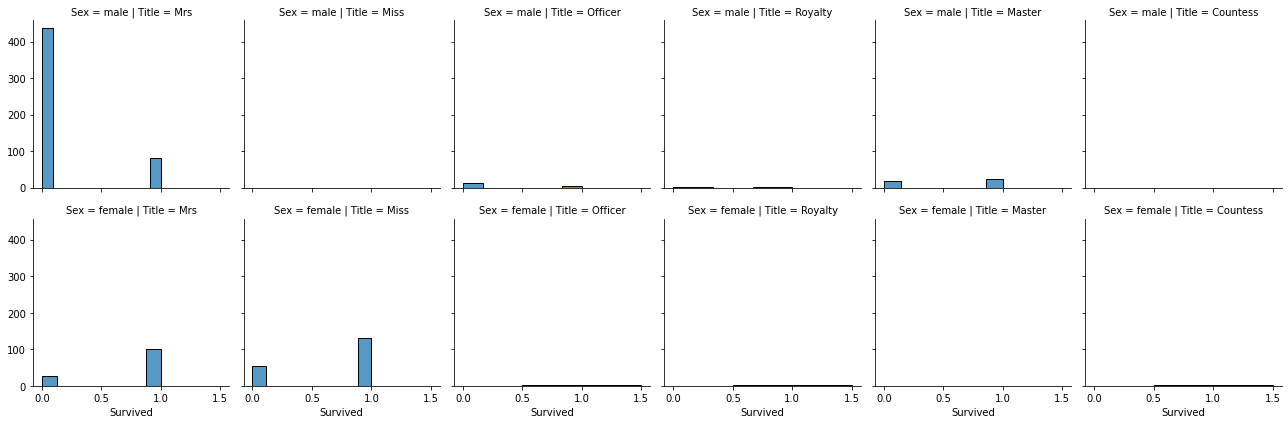

In [20]:
####
# 
# Correlation between Title and Sex in relation to Survival of passengers
#

import seaborn as sns


g = sns.FacetGrid(titanic_df, col="Title", row="Sex")
g.map(sns.histplot, "Survived")


In [21]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S,Mrs
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mrs
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S,Mrs
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs


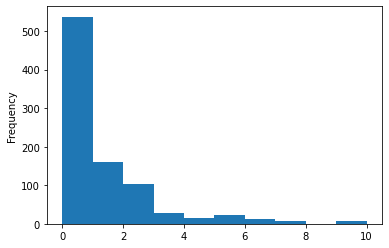

In [22]:
try:
    titanic_df.drop("FamilySize", "columns",inplace=True)
except:
    pass


titanic_df["FamilySize"] = titanic_df["SibSp"] + titanic_df["Parch"]
titanic_df["FamilySize"].plot.hist()

In [24]:
titanic_df.corr()["FamilySize"]

PassengerId   -0.040143
Survived       0.016639
Age           -0.248512
SibSp          0.890712
Parch          0.783111
Fare           0.217138
FamilySize     1.000000
Name: FamilySize, dtype: float64